# Many Species Population Dynamics
Flora Hess (flora.hess@stud.uni-heidelberg.de)<br/>Leonardo K. Reiter (leonardo.reiter@stud.uni-heidelberg.de)<br/>Jason G. Jun (jun.jasongabriel@stud.uni-heidelberg.de)

In [2]:
import numpy as np
import matplotlib
matplotlib.use("webagg") 
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from scipy.integrate import odeint 
from numpy.linalg import inv
from numpy.linalg import eig
import matplotlib.animation as ani
from IPython.display import display, HTML
import time as tm
%matplotlib inline

plt.rcParams["figure.figsize"] = 14, 8
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.facecolor"] = (0.2, 0.2, 0.2)
plt.rcParams["axes.edgecolor"] = (1.0, 1.0, 1.0)
plt.rcParams["grid.color"] = (0.6, 0.6, 0.6)
plt.rcParams["grid.linestyle"] = (3, 1)
plt.rcParams["legend.facecolor"]= (1.0, 1.0, 1.0)
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["animation.embed_limit"] = 100
# print(plt.rcParams.keys())

In this exercise we study the evolution of 6 populations according to the following equations for population dynamics: 3 predator- $\left(P_{i}\right)$ and 3 prey-species $\left(N_{i}\right)$, all parameters positive, always $i, j=1, \ldots, 3$ :
$$
\begin{aligned}
&\frac{\mathrm{d} N_{i}}{\mathrm{~d} t}=N_{i}\left(a_{i}-N_{i}-\sum_{j} b_{i j} P_{j}\right) \\
&\frac{\mathrm{d} P_{i}}{\mathrm{~d} t}=P_{i}\left(\sum_{j} c_{i j} N_{j}-d_{i}\right)
\end{aligned}
$$
The parameters chosen are $a_{1}=11, a_{2}=12, a_{3}=10 ; d_{1}=8, d_{2}=9, d_{3}=17 ;$ the parameters $b i j$ and $c_{i j}$ are given in matrix form here:
$$
b_{i j}=\left(\begin{array}{lll}
2 & 3 & 5 \\
1 & 3 & 7 \\
4 & 3 & 2
\end{array}\right) \quad c_{i j}=\left(\begin{array}{lll}
2 & 3 & 3 \\
3 & 3 & 3 \\
7 & 8 & 2
\end{array}\right)
$$
Notice: the unusual feature here in the equations is that the prey populations $N_{i}$ have a Verhulst style growth limiting factor in their equations, which limits their growth even if there is no predator (model for limited resources even in absence of predators). Notice 2: please do not try to make the equations dimensionless, just use the numbers given here, and the time $t$ instead of normalized $\tau$.
2.1 Stability Analysis

In [4]:
a = np.array([[11],
              [12],
              [10]])
d = np.array([[ 8],
              [ 9],
              [17]])
b=np.array([[2, 3, 5],
            [1, 3, 7],
            [4, 3, 2]])
c=np.array([[2, 3, 3],
            [3, 3, 3],
            [7, 8, 2]])

## Task 1: 
What are the fixed points for the system of equations given above? Hint 1: No complicated computations are necessary, the idea is that you should guess the fixed points very easily. Compare our previous examples. Hint 2: This time there are three fixed points! In addition to our 'usual' ones, there is a third one related to the Verhulst growth limiting factor in the first three equations.

Fix-Point condition: $\dot{N}_{i}=\dot{P}_{i}=0 \quad \forall i\in\{1,2,3\}$
$$
\begin{eqnarray}
\text{FP1:}
&\quad N_{i}&=&0 \quad \forall i\Rightarrow\mathbf{N} &= \mathbf{0}\\
&\quad P_{i}&=&0 \quad \forall i\Rightarrow\mathbf{P} &= \mathbf{0}\\
\text{FP2:}&\quad 
\sum_{j}\nolimits c_{ij}N_{j}-d_{i}&=&0\quad\forall i\Rightarrow\mathbf{N}&=\mathrm{c}^{-1}\mathbf{d}\\
&\quad a_{i}-N_{i}-\sum_{j}\nolimits b_{i j}P_{j}&=&0\quad\forall i
\Rightarrow\mathbf{P}&=\mathrm{b}^{-1}\left(\mathbf{a}-\mathbf{N}\right)\\
\text{FP3:}&\quad
P_{i}&=&0 \quad \forall i\Rightarrow\mathbf{P} &= \mathbf{0}\\
&\quad a_{i}-N_{i}-\sum_{j}\nolimits b_{i j} P_{j} &=& 0\quad \forall i\Rightarrow\mathbf{N} &= \mathbf{a} \\
\end{eqnarray}
$$

In [5]:
x1 = np.zeros((6,1))
x2 = np.concatenate((inv(c)@d, inv(b)@(a-inv(c)@d)))
x3 = np.concatenate((a, np.zeros((3,1))))
xs, labels = [x1, x2, x3], ["N\u2081","N\u2082","N\u2083","P\u2081","P\u2082","P\u2083"]

print("x\u1D62",end="")
for label in labels:
    print(f"|{label:<4}",end="")
for i in range(len(xs)):
    print("\nx"+chr(ord("\u2080")+i+1),end="")
    for value in xs[i].T[0]:
        print(f"|{value:4.1f}",end="")

xᵢ|N₁  |N₂  |N₃  |P₁  |P₂  |P₃  
x₁| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0
x₂| 1.0| 1.0| 1.0| 1.0| 1.0| 1.0
x₃|11.0|12.0|10.0| 0.0| 0.0| 0.0

## Task 2
What is the Jacobi matrix $\mathrm{A}$ at the non-trivial fixed point? (non-trivial FP means here that ALL elements are unequal to zero. There is only one FP with this property.)

$$
\begin{eqnarray}
\mathbf{x} &=& \left(\begin{array}{c}N_1 \\ N_2 \\ N_3 \\ P_1 \\ P_2 \\ P_3\end{array}\right), \quad \mathbf{f}(\mathbf{x}) = 
\left(\begin{array}{c} 
a_1x_1-x_1^2-b_{11}x_1x_4-b_{12}x_1x_5-b_{13}x_1x_6 \\
a_2x_2-x_2^2-b_{21}x_2x_4-b_{22}x_2x_5-b_{23}x_2x_6 \\
a_3x_3-x_3^2-b_{31}x_3x_4-b_{32}x_3x_5-b_{33}x_3x_6 \\
c_{11}x_1x_4+c_{12}x_2x_4+c_{13}x_3x_4-d_1x_4 \\
c_{21}x_1x_5+c_{22}x_2x_5+c_{23}x_3x_5-d_2x_5 \\
c_{31}x_1x_6+c_{32}x_2x_6+c_{33}x_3x_6-d_3x_6
\end{array}\right)\\\\
\mathrm{D}\mathbf{f} &=& \left(\frac{\partial f_i}{\partial x_j}\right)_{ij}\\
&=&\left(\begin{array}{cccccc}
a_1-2x_1-\sum_{j}\nolimits b_{1j}x_{j+3} & 0 & 0 & -b_{11}x_1 & -b_{12}x_1 & -b_{13}x_1\\
0 & a_2-2x_2-\sum_{j}\nolimits b_{2j}x_{j+3} & 0 & -b_{21}x_2 & -b_{22}x_2 & -b_{23}x_2\\
0 & 0 & a_3-2x_3-\sum_{j}\nolimits b_{3j}x_{j+3} & -b_{31}x_3 & -b_{32}x_3 & -b_{33}x_3\\
c_{11}x_4 & c_{12}x_4 & c_{13}x_4 & \sum_{j}\nolimits c_{1j}x_{j}-d_1 & 0 & 0\\
c_{21}x_5 & c_{22}x_5 & c_{23}x_5 & 0 & \sum_{j}\nolimits c_{1j}x_{j}-d_2 & 0\\
c_{31}x_6 & c_{32}x_6 & c_{33}x_6 & 0 & 0 & \sum_{j}\nolimits c_{1j}x_{j}-d_3
\end{array}\right)\\\\
&&\text{Non-trivial FP:}\quad \mathbf{x}^* = \mathbf{x}_2 \\\\
\mathrm{D}\mathbf{f}(\mathbf{x}^*) &=& 
\left(\begin{array}{cccccc} 
-1 & 0 & 0 &-2 &-3 &-5\\
 0 &-1 & 0 &-1 &-3 &-7\\
 0 & 0 &-1 &-4 &-3 &-2\\
 2 & 3 & 3 & 0 & 0 & 0\\
 3 & 3 & 3 & 0 & 0 & 0\\
 7 & 8 & 2 & 0 & 0 & 0
\end{array}\right)\\
\end{eqnarray}
$$

In [6]:
def jacobian_matrix(u0):
    return np.block([[np.diagflat(a-2*u0[:3]-b@u0[3:]),               -b*u0[:3]],
                     [                        c*u0[3:], np.diagflat(c@u0[:3]-d)]])

## Task 3:
Determine the eigenvalues and eigenvectors $\lambda_{i}$ and $\mathbf{v}_{i}, i=1, \ldots 6$ of $\mathrm{A}$ for this fixed point. Plot and discuss the solutions for all 6 populations, starting from an initial value of
$$
\mathbf{v}(0)=(0.1,0.1,0.1,0.1,0.1,0.1)
$$
Hint: if you have a well working preparation exercise for the two populations, this one is relatively easy to generalize for six dimensions here. Plot and discuss the time dependent evolution of the six populations What about oscillations, growth or decay?

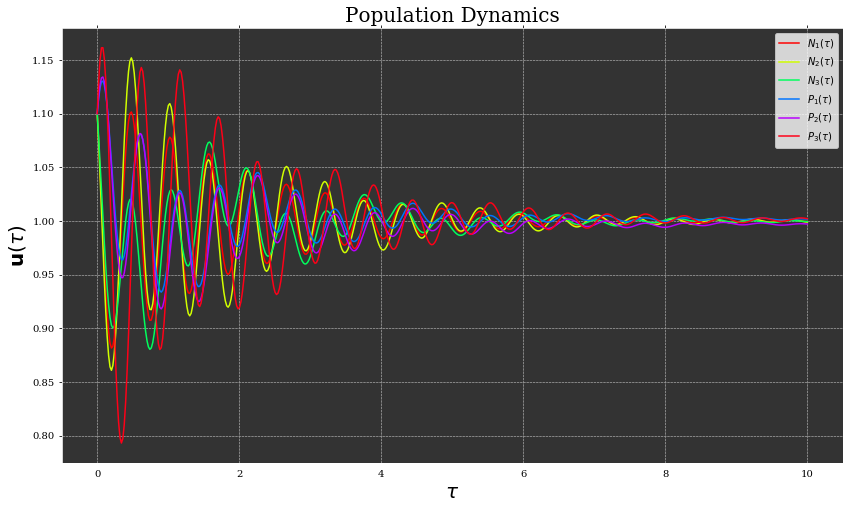

In [8]:
def population(A, v0, T):
    t = np.linspace(0,T,500)
    lam, EVC = eig(A)
    c = inv(EVC)@v0
    v = EVC@(c*np.exp(np.array([lam]).T*t))
    return t, v


def plot_v(t, v, u0, show_animation=False):
    if show_animation:
        plot_animation(t, v.T, u0)
    else:
        plot_figure(t, v, u0)
    pass


def plot_figure(t, v, u0):
    colors = plt.cm.get_cmap("hsv")(np.linspace(0,1,v.shape[0]))
    labels = [r"$N_1(\tau)$", r"$N_2(\tau)$", r"$N_3(\tau)$",r"$P_1(\tau)$", r"$P_2(\tau)$", r"$P_3(\tau)$"]
    for i in range(v.shape[0]):
        plt.plot(t, u0[i]+v[i], c=colors[i], label=labels[i])
    plt.xlabel(r"$\tau$")
    plt.ylabel(r"$\mathbf{u}(\tau)$")
    plt.legend()
    plt.title("Population Dynamics")
    plt.show()
    pass


def plot_animation(t, ys, u0):
    print("Creating animation...")
    print("This may take approximately 1 minute.")
    dt = t[1] - t[0]
    i_lim = int(2 / dt)
    fig = plt.figure()
    ax = plt.axes(xlim=((min(t)*21-max(t))/20, (max(t)*21-min(t))/20),
                  ylim=(u0.min()+ys.min()-.01, u0.max()+ys.max()+.01))
    points, traces = [], []
    colors = plt.cm.get_cmap("hsv")(np.linspace(0,0.9,ys.shape[1]))
    labels = [r"$N_1(\tau)$", r"$N_2(\tau)$", r"$N_3(\tau)$",r"$P_1(\tau)$", r"$P_2(\tau)$", r"$P_3(\tau)$"]
    for i in range(ys.shape[1]):
        point, = ax.plot([], [], marker="o", c=colors[i], label=labels[i])
        trace, = ax.plot([], [], lw=1, c=colors[i])
        points.append(point)
        traces.append(trace)
    plt.legend(loc=1)
    plt.title("Population Dynamics")
    plt.xlabel(r"$\tau$")
    plt.ylabel(r"$\mathbf{u}(\tau)$")
    
    n = len(t)
    def init():
        for i in range(ys.shape[1]):
            points[i].set_data([], [])
            traces[i].set_data([], [])
        return points
    
    def animate(i):
        for j in range(ys.shape[1]):
            points[j].set_data(t[i], u0[j]+ys[i,j])
            traces[j].set_data(t[:i+1], u0[j]+ys[:i+1,j])
        return points
    animation = ani.FuncAnimation(fig, animate, n, init, interval=20, blit=True)
    
    timestamp = tm.perf_counter()
    display(HTML(animation.to_jshtml(fps=60, default_mode="once")))
    print(f"Computation Time: {abs(timestamp-tm.perf_counter()):0.2f}s")
    plt.close()
    pass

T = 10
u0, v0 = xs[1], np.full((6,1), .1)
A = jacobian_matrix(u0)    
t, v = population(A, v0, T)
plot_v(t, v.real, u0, show_animation=False) # just for fun: set show_animation = True; might take a minute to laod

As can be seen, the fixed-point $\mathbf{x} = (1,1,1,1,1,1)$ is stable. All populations show an oscillating expopential decay with time converging to the fixed-point.